In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
# import LAM library for logbook, data analysis...
from pfs.lam.sacFileHandling import Logbook, constructFilelist
import pfs.lam.imageAnalysis as imeas
from pfs.lam.slitFocusAnalysis import *
from pfs.lam.style import colors

In [3]:
from matplotlib import style
style.use('ggplot')

In [4]:
imgPath = '/home/pfs/shared/Pictures/SM3/slitAlign'

In [5]:
smId = 3

In [32]:
# filepath of data model
pmodel = os.environ['LAM_SPS_ANALYSIS_DIR']+"/notebooks/optical/input/slit"  # '/home/pfs/dev/ait-notebook/optical/input/slit'
file = 'slit-defParam-Ouverture100-fiber65.csv'
file = 'Science-slit-defParam-nomask.csv'

In [33]:
zemaxData = pd.read_csv('%s/%s' % (pmodel, file), delimiter=" ")
zemaxMidFit = imeas.fitparabola(x=zemaxData.Slitdefocus, y=zemaxData.MidFiber, deg=15, focus='max')
zemaxEndFit = imeas.fitparabola(x=zemaxData.Slitdefocus, y=zemaxData.ExtremeFiber, deg=15, focus='max')

AttributeError: 'DataFrame' object has no attribute 'Slitdefocus'

In [31]:
zemaxData

,Slitdefocus,MidFiber,ExtremeFiber
0,-2.00,0.02374,0.02034
1,-1.95,0.02501,0.02146
2,-1.90,0.02603,0.02213
3,-1.85,0.02772,0.02325
4,-1.80,0.02961,0.02386
...,...,...,...
75,1.75,0.03407,0.04195
76,1.80,0.03173,0.03974
77,1.85,0.02981,0.03722
78,1.90,0.02794,0.03527


In [8]:
experiments = pd.read_sql_query('select * from Experiment where type="slitAlignment" order by experimentId desc',
                                con='sqlite:////data/ait/experimentLog-sac.db', index_col='experimentId')

experiments['exptime'] = [Logbook.getParameter(experimentId, 'exptime') for experimentId in experiments.index]
experiments['fiber'] = [Logbook.getParameter(experimentId, 'fiber', doRaise=False) for experimentId in experiments.index]

In [9]:
experiments

,name,visitStart,visitEnd,type,cmdStr,comments,anomalies,startdate,cmdError,exptime,fiber
experimentId,,,,,,,,,,,
438,SM3_Slit_Alignment,12717,12776,slitAlignment,"spsait slit align exptime=4.0 position=-1.5,2....",DCB2 halogen no mask,,2021-02-15T14:04:06,,4.0,scibotend
437,SM3_Slit_Alignment,12657,12716,slitAlignment,"spsait slit align exptime=4.0 position=-1.5,2....",DCB2 halogen no mask,,2021-02-15T13:41:11,,4.0,scibotmid
436,SM3_Slit_Alignment,12597,12656,slitAlignment,"spsait slit align exptime=4.0 position=-1.5,2....",DCB2 halogen no mask,,2021-02-15T13:17:59,,4.0,scitopmid
435,SM3_Slit_Alignment,12537,12596,slitAlignment,"spsait slit align exptime=4.0 position=-1.5,2....",DCB2 halogen no mask,,2021-02-15T12:53:47,,4.0,scitopend
426,SM3_Slit_Alignment,12379,12438,slitAlignment,"spsait slit align exptime=4.0 position=-1.5,2....",DCB2 halogen no mask,,2021-02-12T17:11:51,,4.0,scitopend
...,...,...,...,...,...,...,...,...,...,...,...
40,first_test,1199,1258,slitAlignment,slit throughfocus exptime=3.0 lowBound=-0.5 up...,,,2018-07-16T17:07:37,None,3.0,engtopmid
39,first_test,1196,1198,slitAlignment,slit throughfocus exptime=3.0 lowBound=-0.5 up...,,light was on,2018-07-16T17:05:53,None,3.0,engtopmid
38,first_test,1132,1191,slitAlignment,slit throughfocus exptime=6.0 lowBound=-0.5 up...,,,2018-07-16T16:02:19,None,6.0,engtopmid


In [10]:
experiments.cmdStr[426]

"spsait slit align exptime=4.0 position=-1.5,2.5,60 duplicate=1 fiber=scitopend tail='dcb sources off=halogen'  comments='DCB2 halogen no mask '"

## Data required : 
To be able to find the right focus, some data acquisition is required.

you need to use ics_spsaitActor to perform your sequence

example : <b>slit throughfocus exptime=6.0 lowBound=-0.5 upBound=1.5 fiber=engbotend nbPosition=10 duplicate=1 </b>

-0.5 : 1.5 is the range of the slit focus


## Input Parameters : 
The only parameters needed is the experimentIds that match your data acquisition sequence

In [12]:
com = True
doBck =True
corrector = False
experimentIds = [435,436,437,438]
head = 0
tail = 0
#bck_expId = 260

dfs = []

In [13]:
doPrint = False
doPlot = False

In [15]:
for experimentId in experimentIds:
    dfs.append(getSlitTF(experimentId=experimentId, com=com, head=head, tail=tail, doBck=doBck,doPrint=doPrint, doPlot=doPlot))

cube = pd.concat(dfs)

   

/software/drp/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/scipy/optimize/minpack.py:447: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)


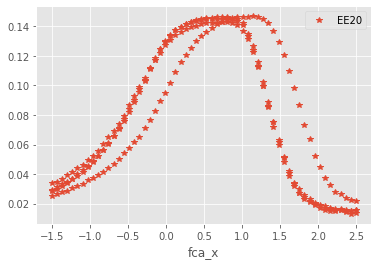

In [16]:
cube.plot(x='fca_x',y='EE20',style='*')

In [21]:
def fitFocusData(cube, corrector=False, doPlot=False, index='fca_x'):
    thfoc_data = []
    
    for experimentId, series in cube.groupby('experimentId'):
        series = series.dropna()
        thfoc = getFocus(series, 'EE20', index, corrector=corrector)
        #for criteria in ['brightness', 'fwhm']:
        #    thfoc[criteria] = getFocus(series, criteria, index, corrector=corrector)[criteria]

        thfoc['px'] = np.interp(thfoc[index], series[index], series['px'])
        thfoc['py'] = np.interp(thfoc[index], series[index], series['py'])
        thfoc['experimentId'] = experimentId
        thfoc_data.append(thfoc)
        
    thfoc_data = pd.concat(thfoc_data)

    if doPlot:
        kwargs = dict(grid=True, figsize=(14,10), legend=True, subplots=True)
        #criterias = ['EE20', 'brightness', 'fwhm']
        criterias = ['EE20']

        for experimentId, fit in thfoc_data.groupby('experimentId'):
            raw = cube.query("experimentId==%d"%(experimentId))
            axes = fit.set_index(index)[criterias].plot(**kwargs)
            for i, criteria in enumerate(criterias):
                axes[i].plot(raw[index].values, raw[criteria].values, 'o')
                
    return thfoc_data

In [25]:
def getFocusModel(fitdata, index='fca_x'):
    data = []
    for experimentId, series in fitdata.groupby('experimentId'):
        series = series.dropna()
        for criteria in ['EE20']: #, 'brightness', 'fwhm']:
            ixmax = series[criteria].idxmax() if criteria !='fwhm' else series[criteria].idxmin()
            focus = series[index][ixmax]
            px = series.px[ixmax]
            py = series.py[ixmax]
            mat = [experimentId, criteria, px, py, focus]
            data.append(tuple(mat))
    
    return pd.DataFrame(data, columns=['experimentId', 'criteria', 'px', 'py', index])

In [22]:
thfocModel= fitFocusData(cube, corrector=False, doPlot=False)

In [26]:
focusModel = getFocusModel(thfocModel)

In [29]:
vline = True
plotModel = True
criteria = 'EE20'
index = 'fca_x'

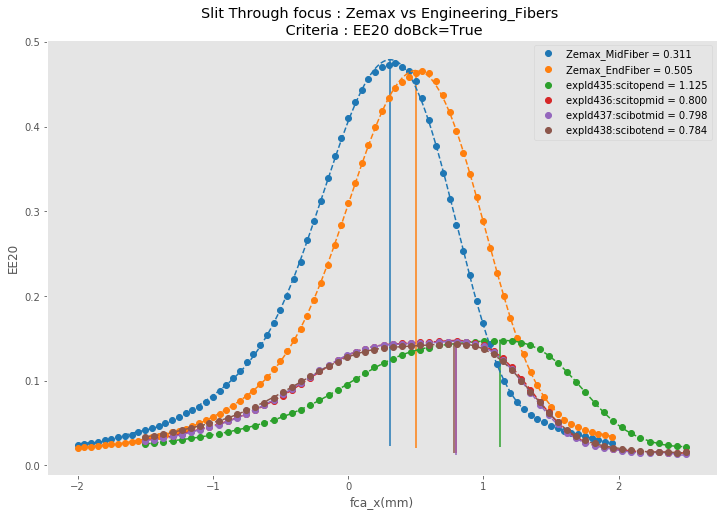

In [30]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)
j=2

if plotModel:
    ax1.plot(zemaxData.Slitdefocus, zemaxData.MidFiber, 'o', color=colors[0], label='Zemax_MidFiber = %.3f' % zemaxMidFit.focus)
    ax1.plot(zemaxMidFit.x, zemaxMidFit.y, '--', color=colors[0])
    if vline:
        ax1.vlines(color=colors[0], **zemaxMidFit.vline)

    ax1.plot(zemaxData.Slitdefocus, zemaxData.ExtremeFiber, 'o', color=colors[1], label='Zemax_EndFiber = %.3f' % zemaxEndFit.focus)
    ax1.plot(zemaxEndFit.x, zemaxEndFit.y, '--', color=colors[1])
    if vline:
        ax1.vlines(color=colors[1], **zemaxEndFit.vline)

for experimentId, df in cube.groupby('experimentId'):
    fit = thfocModel.query("experimentId==%d"%(experimentId))
    focus = focusModel.query("experimentId==%d and criteria=='%s'"%(experimentId, criteria))
    
    ax1.plot(df[index], df[criteria], 'o', color=colors[j], 
             label='expId%d:%s = %.3f' % (experimentId, experiments.fiber[experimentId], focus[index]))
    ax1.plot(fit[index], fit[criteria], '--', color=colors[j])
    
    if vline:
        ax1.vlines(x=focus[index], ymin=fit[criteria].min(), ymax = fit[criteria].max(), color=colors[j])
    j+=1

    
lns = [line for i, line in enumerate(ax1.get_lines()) if not i % 2]
labs = [line.get_label() for line in lns]

ax1.legend(lns, labs)
ax1.set_xlabel('%s(mm)'%index)
ax1.set_ylabel(criteria)

plt.title('Slit Through focus : Zemax vs Engineering_Fibers \n Criteria : %s doBck=True' %criteria)
plt.grid()

In [ ]:
distance_fibres = 138.84
delta_focus = (1.086 - 0.633)
angle=np.arctan(delta_focus/distance_fibres)
angle_degre=(angle*180)/(np.pi)
print(angle_degre)


In [ ]:
((0.648+0.658)/2) - 0.309


In [ ]:
0.270-0.0062

In [ ]:
1.532-0.885